In [1]:
import torch.nn as nn
from torch.optim import lr_scheduler
import torch
import numpy as np


import torch.nn.functional as F


from cifar_dl_dt_helper import get_dataloaders_sizes_classes
from CifarModel1 import Cifar_model1
from pytorch_training2 import Pytorch_training_helper
from pytorch_model_helper import get_parameters_to_vectors,new_theta,get_best_model_details_after_training
from pytorch_model_helper import get_n_params


In [2]:
from CifarModel21 import Cifar_model21
from CifarModel22 import Cifar_model22
from CifarModel23 import Cifar_model23
from CifarModel24 import Cifar_model24
from CifarModel25 import Cifar_model25

from CifarModel26 import Cifar_model26
from CifarModel27 import Cifar_model27
from CifarModel28 import Cifar_model28
from CifarModel29 import Cifar_model29
from CifarModel30 import Cifar_model30

from CifarModel31 import Cifar_model31



In [3]:
data_dir = './data/cifar10'
result_folder = "reek_cifar10_model_10Models_finalResult/"

In [4]:
batch_size = 512
num_epochs = 5

In [5]:
step = 0.0004
gamma_lr_scheduler = 0.1
criterion = nn.CrossEntropyLoss()
weight_decay = 1e-4

dataloaders,dataset_sizes,class_names = get_dataloaders_sizes_classes(data_dir,batch_size)
py_train_helper = Pytorch_training_helper(dataloaders,dataset_sizes,batch_size,result_folder,
                                          flag_grad=1,
                                          flag_weights=1,
                                          flag_frobenius_norm=1)

In [6]:
cifar_model_21= Cifar_model21()
cifar_model_22= Cifar_model22()
cifar_model_23= Cifar_model23()
cifar_model_24= Cifar_model24()
cifar_model_25= Cifar_model25()


cifar_model_26= Cifar_model26()
cifar_model_27= Cifar_model27()
cifar_model_28= Cifar_model28()
cifar_model_29= Cifar_model29()
cifar_model_30= Cifar_model30()

cifar_model_31= Cifar_model31()



In [7]:
all_models = [
            cifar_model_21,
              cifar_model_22,
              cifar_model_23,
              cifar_model_24,
              cifar_model_25,
              cifar_model_26,
              cifar_model_27,
              cifar_model_28,
              cifar_model_29,
    
              cifar_model_30,
                  
              cifar_model_31,
                          
             ]


In [8]:

cifar_model_1= {}
grad_norm_per_epoch1= {}
train_losses1= {}
val_losses1= {}
train_acc1= {}
val_acc1= {}
model_wts_epoch1= {}
sensitivity1= {}

best_model_train_loss = {}
best_model_test_loss = {}

best_model_train_acc ={}
best_model_test_acc ={}

for index,model in enumerate(all_models):
    print("model ",index+1)
    optimizer1 = torch.optim.Adam(model.parameters(),lr = step)

    exp_lr_scheduler1 = lr_scheduler.StepLR(
        optimizer1, step_size=11, gamma=gamma_lr_scheduler
    )
    model_name= str(index)+"_model_"
    
    cifar_model_1[index],grad_norm_per_epoch1[index],train_losses1[index],val_losses1[index],train_acc1[index],val_acc1[index],model_wts_epoch1[index],sensitivity1[index] = py_train_helper.train_model(model,criterion,optimizer1,exp_lr_scheduler1,model_name,num_epochs=num_epochs)
    grad_norm,train_loss,val_loss,tr_acc,vl_acc,mdl_wts_eph,sensi = get_best_model_details_after_training(grad_norm_per_epoch1[index],train_losses1[index],val_losses1[index],train_acc1[index],val_acc1[index],model_wts_epoch1[index],sensitivity1[index])
    
    best_model_train_loss[index] = train_loss
    best_model_test_loss[index] = val_loss

    best_model_train_acc[index] = tr_acc
    best_model_test_acc[index] = vl_acc

model  1
Training started:
Phase: train Epoch: 1/5 Loss: 2.2443 Acc: 0.1391        
Phase: validation   Epoch: 1/5 Loss: 2.0705 Acc: 0.2449        
Phase: train Epoch: 2/5 Loss: 1.9777 Acc: 0.2691        
Phase: validation   Epoch: 2/5 Loss: 1.8346 Acc: 0.3380        
Phase: train Epoch: 3/5 Loss: 1.8277 Acc: 0.3291        
Phase: validation   Epoch: 3/5 Loss: 1.7386 Acc: 0.3664        
Phase: train Epoch: 4/5 Loss: 1.7634 Acc: 0.3466        
Phase: validation   Epoch: 4/5 Loss: 1.6829 Acc: 0.3812        
Phase: train Epoch: 5/5 Loss: 1.7247 Acc: 0.3607        
Phase: validation   Epoch: 5/5 Loss: 1.6358 Acc: 0.3948        
Training completed in 7m 27s
Best test loss: 1.6358 | Best test accuracy: 0.3948
model  2
Training started:
Phase: train Epoch: 1/5 Loss: 2.2172 Acc: 0.1534        
Phase: validation   Epoch: 1/5 Loss: 1.9842 Acc: 0.2727        
Phase: train Epoch: 2/5 Loss: 1.9142 Acc: 0.2981        
Phase: validation   Epoch: 2/5 Loss: 1.7702 Acc: 0.3523        
Phase: train Epoch

In [10]:
# X = [get_n_params(cifar_model1),
#      get_n_params(cifar_model2),
#      get_n_params(cifar_model3),
#     get_n_params(cifar_model4),
#      get_n_params(cifar_model5),
#      get_n_params(cifar_model6),
#     get_n_params(cifar_model7),
#      get_n_params(cifar_model8),
#      get_n_params(cifar_model9),
#      get_n_params(cifar_model10)
#     ]
# X
X = [get_n_params(i) for i in all_models]

In [11]:
X

[11085, 12029, 13656, 16904, 29254, 52004, 63054, 74754, 83854, 130122, 425194]

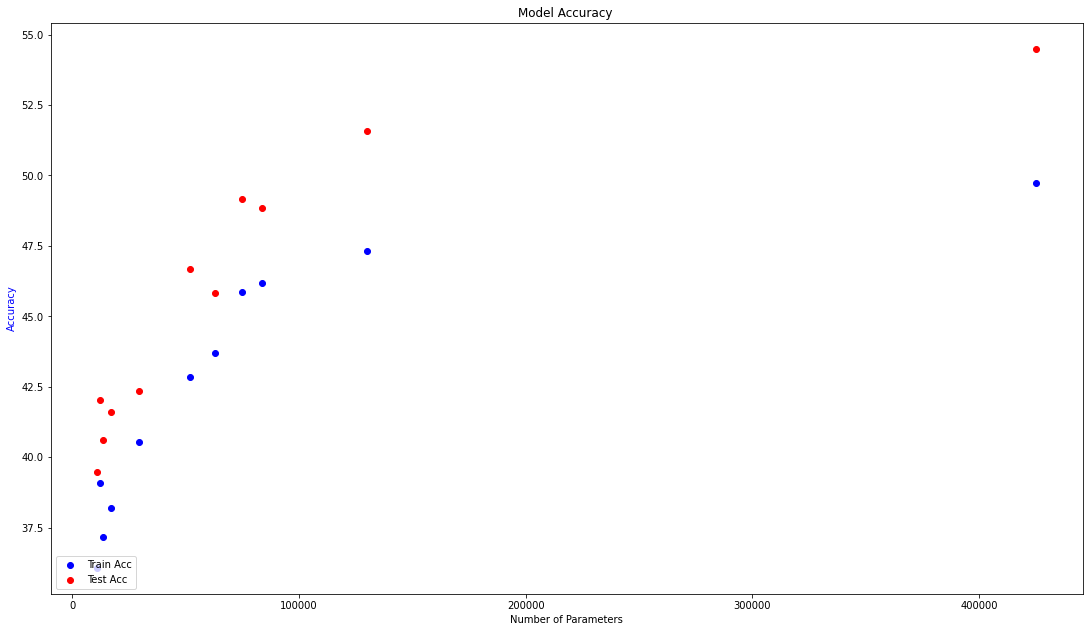

In [13]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots()
fig.set_size_inches(18.5, 10.5)
# ax.get_xaxis().get_major_formatter().set_useOffset(False)
ax.get_xaxis().get_major_formatter().set_scientific(False)

ax.scatter(X,[i * 100 for i in best_model_train_acc.values()],color="Blue", marker="o")
ax.scatter(X,[i * 100 for i in best_model_test_acc.values()],color="Red", marker="o")
ax.legend(['Train Acc','Test Acc'],loc="lower left")
ax.set_xlabel("Number of Parameters",color="Black")
# ax.set_xscale('log')


ax.set_ylabel("Accuracy",color = "blue")
ax.set_title("Model Accuracy ",color = "Black")
plt.show()

fig.savefig(result_folder+'HW3_1_10_model_acc.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

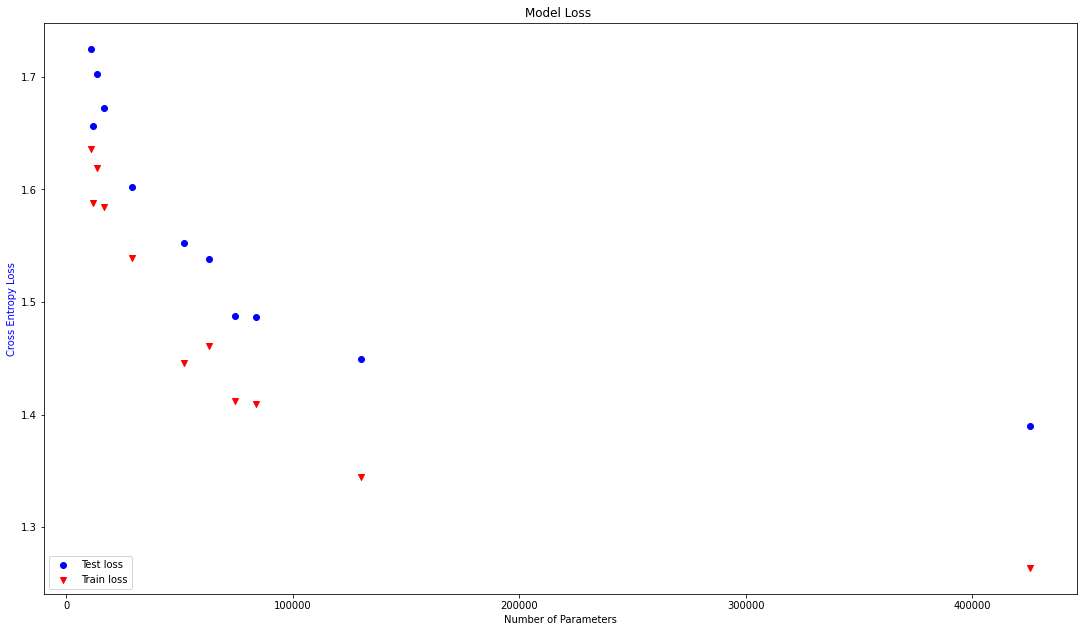

In [14]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.scatter(X,best_model_train_loss.values(),color="Blue", marker="o")
ax.scatter(X,best_model_test_loss.values(),color="Red", marker="v")
ax.legend(['Test loss','Train loss'],loc="lower left")
ax.set_xlabel("Number of Parameters",color="Black")
# ax.set_xscale('log')
ax.set_ylabel("Cross Entropy Loss",color = "blue")
ax.set_title("Model Loss ",color = "Black")
plt.show()
fig.savefig(result_folder+'HW3_1_10_model_loss.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')